<a href="https://colab.research.google.com/github/annacfisher/ds4002_project1/blob/main/VADER_and_Stat_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install vaderSentiment


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.6 MB/s eta 0:00:00


Vader Code

In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd


analyser = SentimentIntensityAnalyzer()

analyser.polarity_scores("I hate everything.")

{'neg': 0.609, 'neu': 0.391, 'pos': 0.0, 'compound': -0.8313}

Import Recruit File from Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/DS 4002/Project 1/Extracted Twitter Data - All_Recruits(1).csv'
df = pd.read_csv(file_path)
print(df.head())


            User        Full_Name  XOS_Rating                 High_School  \
0     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
1     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
2     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
3  BraytonAlford  Alford, Brayton         NaN                Carroll High   
4  BraytonAlford  Alford, Brayton         NaN                Carroll High   

  State                                              Tweet  
0    TN  Thankful to be recognized as a top prospect in...  
1    TN  After a great junior day visit in Tallahassee....  
2    TN  After a great conversation with @NastyWideOuts...  
3    IA  Fractured my foot this year but pushed through...  
4    IA  Iowa Football: Top Wide Receivers in 2026 http...  


Create a function that adds columns of the Vader output

In [ ]:
df['sentiment_scores'] = df['Tweet'].apply(lambda x: analyser.polarity_scores(str(x)))

# Extracting specific sentiment scores (optional)
df['compound'] = df['sentiment_scores'].apply(lambda x: x['compound'])
df['pos'] = df['sentiment_scores'].apply(lambda x: x['pos'])
df['neu'] = df['sentiment_scores'].apply(lambda x: x['neu'])
df['neg'] = df['sentiment_scores'].apply(lambda x: x['neg'])

In [ ]:
print(df.head())


            User        Full_Name  XOS_Rating                 High_School  \
0     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
1     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
2     MarteriusB  Boyd, Marterius         4.0  Lausanne Collegiate School   
3  BraytonAlford  Alford, Brayton         NaN                Carroll High   
4  BraytonAlford  Alford, Brayton         NaN                Carroll High   

  State                                              Tweet  \
0    TN  Thankful to be recognized as a top prospect in...   
1    TN  After a great junior day visit in Tallahassee....   
2    TN  After a great conversation with @NastyWideOuts...   
3    IA  Fractured my foot this year but pushed through...   
4    IA  Iowa Football: Top Wide Receivers in 2026 http...   

                                    sentiment_scores  compound    pos    neu  \
0  {'neg': 0.0, 'neu': 0.5, 'pos': 0.5, 'compound...    0.7901  0.500  0.500   
1  {

Import Established Players File from Drive

In [ ]:
est_file_path = '/content/drive/My Drive/DS 4002/Project 1/Extracted Twitter Data - Established_Players.csv'
est_df = pd.read_csv(est_file_path)
print(est_df.head())

     Full_Name         User                                              Tweet
0  Perry Jones  @supe_jones  @supe_jones: RT @CoachMikeLondon: FYI  Recruit...
1  Perry Jones  @supe_jones  @supe_jones: @Dyrell_Roberts @Therapyquotes_ A...
2  Perry Jones  @supe_jones  @supe_jones: RT @Dyrell_Roberts: FEBRUARY 2️⃣0...
3  Perry Jones  @supe_jones  @supe_jones: Looking for Virginia’s best! http...
4  Perry Jones  @supe_jones  Delaware! I’m excited to meet and talk with so...


Apply Vader to the Established Players File

In [ ]:
est_df['sentiment_scores'] = est_df['Tweet'].apply(lambda x: analyser.polarity_scores(str(x)))

# Extracting specific sentiment scores (optional)
est_df['compound'] = est_df['sentiment_scores'].apply(lambda x: x['compound'])
est_df['pos'] = est_df['sentiment_scores'].apply(lambda x: x['pos'])
est_df['neu'] = est_df['sentiment_scores'].apply(lambda x: x['neu'])
est_df['neg'] = est_df['sentiment_scores'].apply(lambda x: x['neg'])

In [ ]:
print(est_df.head())

     Full_Name         User  \
0  Perry Jones  @supe_jones   
1  Perry Jones  @supe_jones   
2  Perry Jones  @supe_jones   
3  Perry Jones  @supe_jones   
4  Perry Jones  @supe_jones   

                                               Tweet  \
0  @supe_jones: RT @CoachMikeLondon: FYI  Recruit...   
1  @supe_jones: @Dyrell_Roberts @Therapyquotes_ A...   
2  @supe_jones: RT @Dyrell_Roberts: FEBRUARY 2️⃣0...   
3  @supe_jones: Looking for Virginia’s best! http...   
4  Delaware! I’m excited to meet and talk with so...   

                                    sentiment_scores  compound    pos    neu  \
0  {'neg': 0.0, 'neu': 0.856, 'pos': 0.144, 'comp...    0.3680  0.144  0.856   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  0.000  1.000   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...    0.0000  0.000  1.000   
3  {'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'comp...    0.6696  0.473  0.527   
4  {'neg': 0.0, 'neu': 0.652, 'pos': 0.348, 'comp...    0.7081  0.348  0.652

Compare Summary Statistics

In [ ]:
print("Summary Statistics for df:")
print(df[['compound', 'pos', 'neu', 'neg']].describe())

print("\nSummary Statistics for est_df:")
print(est_df[['compound', 'pos', 'neu', 'neg']].describe())


Summary Statistics for df:
         compound         pos         neu         neg
count  168.000000  168.000000  168.000000  168.000000
mean     0.485768    0.209083    0.776065    0.014857
std      0.363021    0.164513    0.166281    0.054118
min     -0.569600    0.000000    0.233000    0.000000
25%      0.242950    0.086750    0.666250    0.000000
50%      0.599400    0.205000    0.777500    0.000000
75%      0.791675    0.313500    0.903000    0.000000
max      0.975900    0.767000    1.000000    0.445000

Summary Statistics for est_df:
        compound        pos        neu        neg
count  80.000000  80.000000  80.000000  80.000000
mean    0.279214   0.158162   0.801275   0.040563
std     0.413524   0.162652   0.170712   0.077290
min    -0.804700   0.000000   0.428000   0.000000
25%     0.000000   0.000000   0.664250   0.000000
50%     0.348050   0.141000   0.817500   0.000000
75%     0.639825   0.289500   1.000000   0.040500
max     0.986000   0.572000   1.000000   0.310000


Compare Histograms

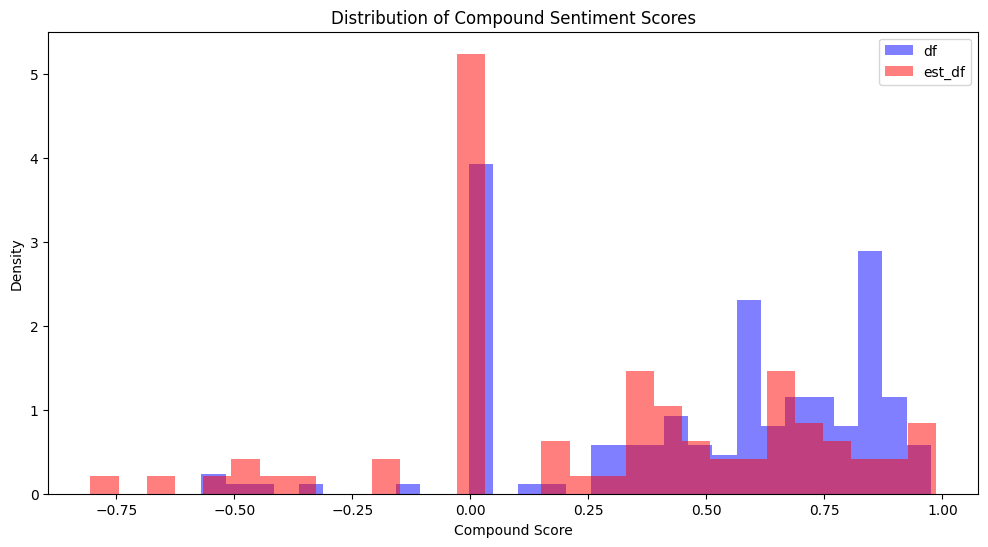

In [ ]:
import matplotlib.pyplot as plt

# Plot compound score distributions
plt.figure(figsize=(12, 6))
plt.hist(df['compound'], bins=30, alpha=0.5, label='df', color='blue', density=True)
plt.hist(est_df['compound'], bins=30, alpha=0.5, label='est_df', color='red', density=True)
plt.legend()
plt.title('Distribution of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.show()


Check for normality to undergo T-test

<ipython-input-31-341c217dac04>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['compound'], label='df', shade=True, color='blue')
<ipython-input-31-341c217dac04>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(est_df['compound'], label='est_df', shade=True, color='red')


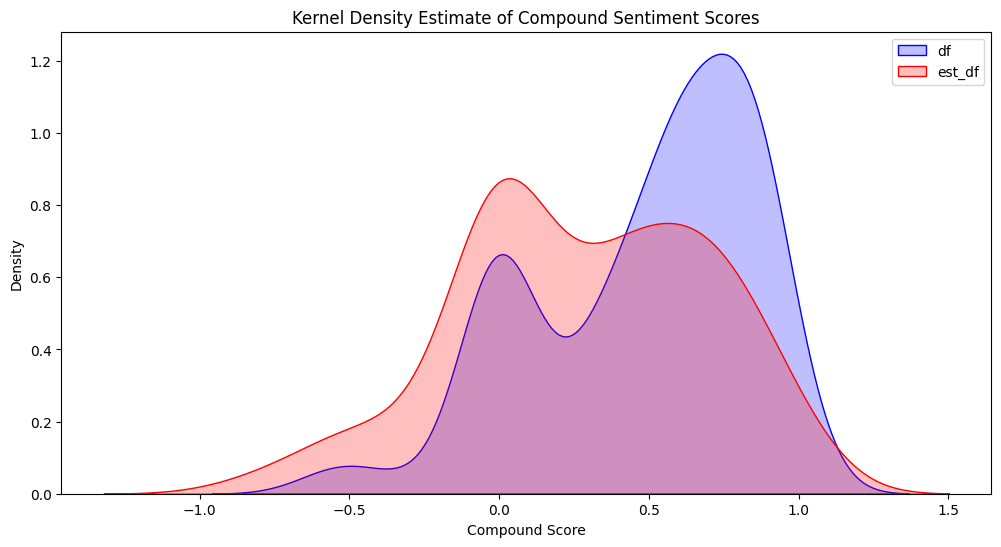

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(df['compound'], label='df', shade=True, color='blue')
sns.kdeplot(est_df['compound'], label='est_df', shade=True, color='red')
plt.title('Kernel Density Estimate of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import shapiro

# Check normality for df (high school recruits)
shapiro_df = shapiro(df['compound'])
print(f"Shapiro-Wilk test for df: Statistic={shapiro_df.statistic}, p-value={shapiro_df.pvalue}")

# Check normality for est_df (gritty college players)
shapiro_est_df = shapiro(est_df['compound'])
print(f"Shapiro-Wilk test for est_df: Statistic={shapiro_est_df.statistic}, p-value={shapiro_est_df.pvalue}")


Shapiro-Wilk test for df: Statistic=0.8964371574515103, p-value=1.8351494985879236e-09
Shapiro-Wilk test for est_df: Statistic=0.9483721334615888, p-value=0.002784529858455138


Based on results from the Density Plot and the Shapiro-Wilk test. We have statistical evidence that our data is not normally distributed. Therefore, we will not use a T-test, but rather conduct a Mann-Whitney U test instead.

In [ ]:
from scipy.stats import mannwhitneyu

mw_stat, mw_pval = mannwhitneyu(est_df['compound'], df['compound'])
print(f"Mann-Whitney U test: Statistic={mw_stat}, P-value={mw_pval}")


Mann-Whitney U test: Statistic=4790.0, P-value=0.00023428929963000372


Based on our results from the Mann-Whitney U Test. There is significant statistical evidence that established gritty players have a differing compound vader score than that of incoming recruits. Therefore, the compound vader score could be used as an indicator of recruits grit.

Run the tests for positive sentiment

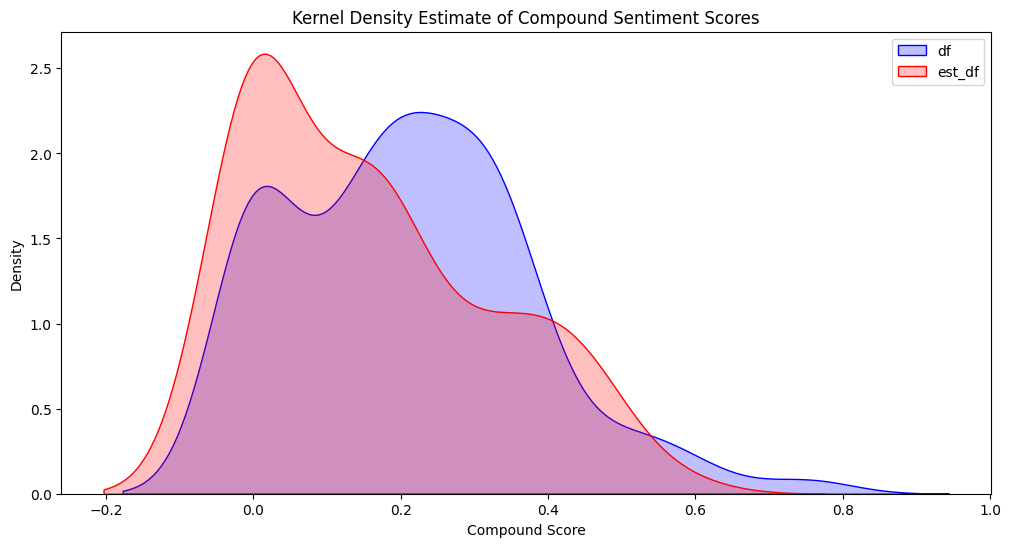

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.kdeplot(df['pos'], label='df', shade=True, color='blue')
sns.kdeplot(est_df['pos'], label='est_df', shade=True, color='red')
plt.title('Kernel Density Estimate of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
from scipy.stats import shapiro

# Check normality for df (high school recruits)
shapiro_df = shapiro(df['pos'])
print(f"Shapiro-Wilk test for df: Statistic={shapiro_df.statistic}, p-value={shapiro_df.pvalue}")

# Check normality for est_df (gritty college players)
shapiro_est_df = shapiro(est_df['pos'])
print(f"Shapiro-Wilk test for est_df: Statistic={shapiro_est_df.statistic}, p-value={shapiro_est_df.pvalue}")


Shapiro-Wilk test for df: Statistic=0.9325670263265221, p-value=4.3273572213550943e-07
Shapiro-Wilk test for est_df: Statistic=0.8592710821409469, p-value=3.359658364805142e-07


In [ ]:
from scipy.stats import mannwhitneyu

mw_stat, mw_pval = mannwhitneyu(est_df['pos'], df['pos'])
print(f"Mann-Whitney U test: Statistic={mw_stat}, P-value={mw_pval}")

Mann-Whitney U test: Statistic=5478.0, P-value=0.017414963399281273


Run the test for neutral sentiment

<ipython-input-50-e2b15a379349>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['neu'], label='df', shade=True, color='blue')
<ipython-input-50-e2b15a379349>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(est_df['neu'], label='est_df', shade=True, color='red')


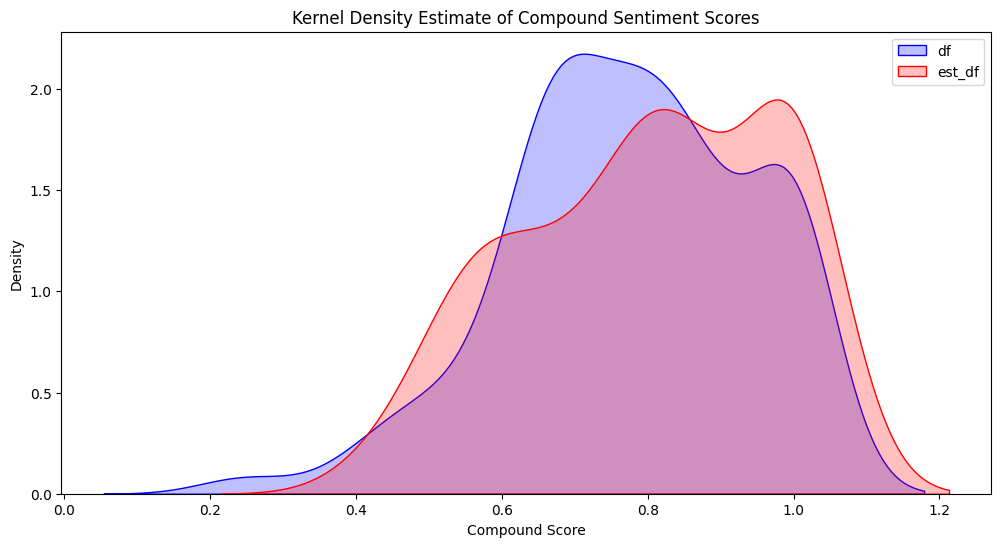

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['neu'], label='df', shade=True, color='blue')
sns.kdeplot(est_df['neu'], label='est_df', shade=True, color='red')
plt.title('Kernel Density Estimate of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# Check normality for df (high school recruits)
shapiro_df = shapiro(df['neu'])
print(f"Shapiro-Wilk test for df: Statistic={shapiro_df.statistic}, p-value={shapiro_df.pvalue}")

# Check normality for est_df (gritty college players)
shapiro_est_df = shapiro(est_df['neu'])
print(f"Shapiro-Wilk test for est_df: Statistic={shapiro_est_df.statistic}, p-value={shapiro_est_df.pvalue}")


Shapiro-Wilk test for df: Statistic=0.9456021948030798, p-value=4.708812722252981e-06
Shapiro-Wilk test for est_df: Statistic=0.9060687402236055, p-value=2.21806453196289e-05


In [ ]:
mw_stat, mw_pval = mannwhitneyu(est_df['neu'], df['neu'])
print(f"Mann-Whitney U test: Statistic={mw_stat}, P-value={mw_pval}")

Mann-Whitney U test: Statistic=7275.0, P-value=0.2906025112426016


Run the test for negative sentiment

<ipython-input-53-06465257b9e6>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['neg'], label='df', shade=True, color='blue')
<ipython-input-53-06465257b9e6>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(est_df['neg'], label='est_df', shade=True, color='red')


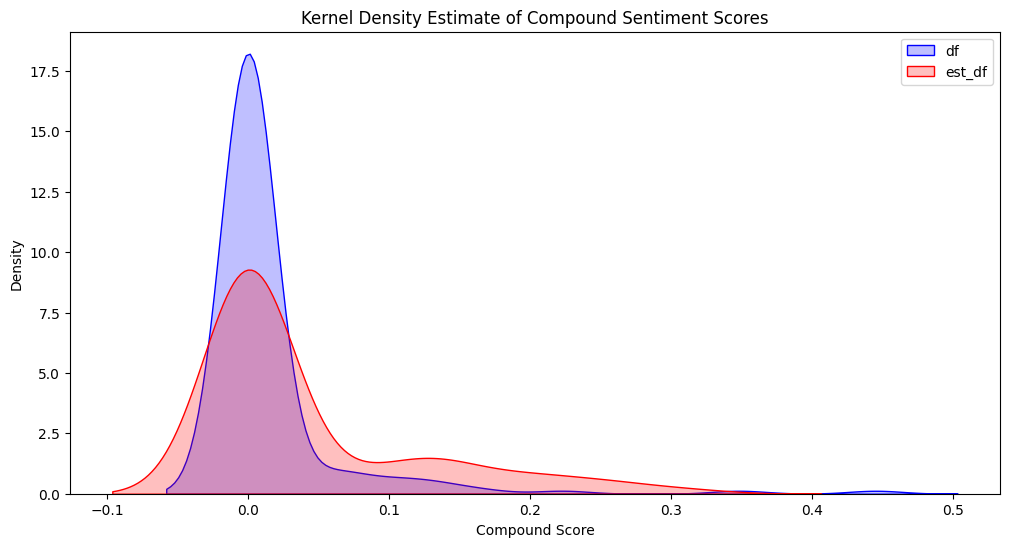

In [ ]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['neg'], label='df', shade=True, color='blue')
sns.kdeplot(est_df['neg'], label='est_df', shade=True, color='red')
plt.title('Kernel Density Estimate of Compound Sentiment Scores')
plt.xlabel('Compound Score')
plt.ylabel('Density')
plt.legend()
plt.show()


In [ ]:
# Check normality for df (high school recruits)
shapiro_df = shapiro(df['neg'])
print(f"Shapiro-Wilk test for df: Statistic={shapiro_df.statistic}, p-value={shapiro_df.pvalue}")

# Check normality for est_df (gritty college players)
shapiro_est_df = shapiro(est_df['neg'])
print(f"Shapiro-Wilk test for est_df: Statistic={shapiro_est_df.statistic}, p-value={shapiro_est_df.pvalue}")


Shapiro-Wilk test for df: Statistic=0.3076246023710135, p-value=7.190950247730347e-25
Shapiro-Wilk test for est_df: Statistic=0.594409062044344, p-value=1.5659380442044962e-13


In [ ]:
mw_stat, mw_pval = mannwhitneyu(est_df['neg'], df['neg'])
print(f"Mann-Whitney U test: Statistic={mw_stat}, P-value={mw_pval}")

Mann-Whitney U test: Statistic=7788.0, P-value=0.0015948518997472066


Using Cliff's delta to measure the size of the difference

In [ ]:
!pip install cliffs-delta


In [ ]:
from cliffs_delta import cliffs_delta

delta, interpretation = cliffs_delta(df['compound'], est_df['compound'])
print(f"Cliff’s Delta for Compound Score: {delta}, Interpretation: {interpretation}")

delta, interpretation = cliffs_delta(df['pos'], est_df['pos'])
print(f"Cliff’s Delta for Positive Sentiment: {delta}, Interpretation: {interpretation}")

delta, interpretation = cliffs_delta(df['neg'], est_df['neg'])
print(f"Cliff’s Delta for Negative Sentiment: {delta}, Interpretation: {interpretation}")


delta, interpretation = cliffs_delta(df['neu'], est_df['neu'])
print(f"Cliff’s Delta for Neutral Sentiment: {delta}, Interpretation: {interpretation}")



Cliff’s Delta for Compound Score: 0.28720238095238093, Interpretation: small
Cliff’s Delta for Positive Sentiment: 0.18482142857142858, Interpretation: small
Cliff’s Delta for Negative Sentiment: -0.15892857142857142, Interpretation: small
Cliff’s Delta for Neutral Sentiment: -0.08258928571428571, Interpretation: negligible
